In [1]:
import numpy as np
from matplotlib import pyplot as plt


i = np.loadtxt('characters/i.txt', delimiter=',')
d = np.loadtxt('characters/d.txt', delimiter=',')

n_letters = 2
labels = [[0]] * len(d) + [[1]] * len(i)
letters = np.concatenate((d, i))
print(letters.shape)

(20, 10000)


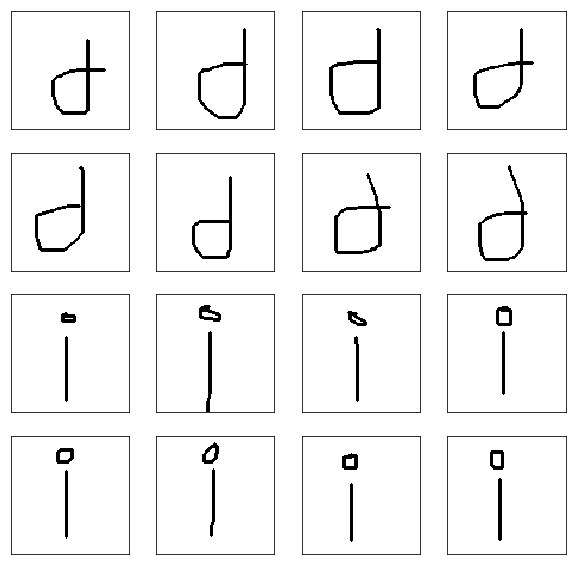

In [2]:
plt.figure(figsize=(10,10))
arr = np.concatenate((letters[:8], letters[-8:]))
for im in range(16):
    plt.subplot(4, 4, im+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(arr[im].reshape(100, 100).T, cmap=plt.cm.binary)

In [3]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


data = scale(letters)
data = (data - data.mean()) / data.std()
pca = PCA(n_components=n_letters).fit(data)
tdata = pca.transform(data)
print(tdata.shape)
X_train, X_test, y_train, y_test = train_test_split(tdata, labels, test_size=0.3, random_state=0)

(20, 2)


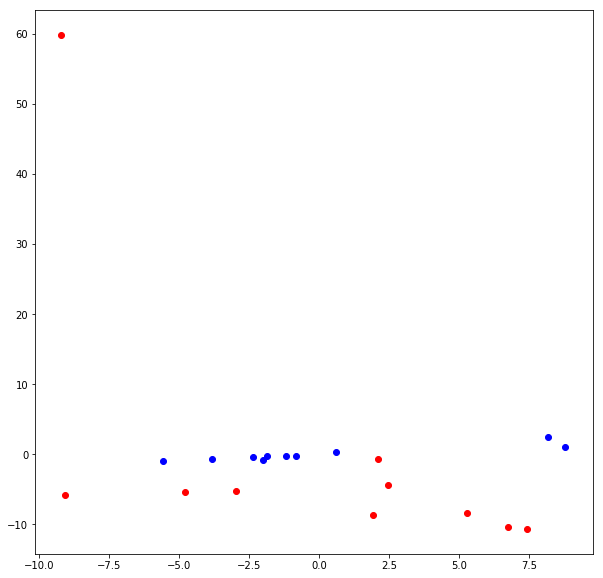

In [4]:
i_points = pca.transform(scale(i))
d_points = pca.transform(scale(d))

plt.figure(figsize=(10,10))
plt.scatter(d_points[:, 0], d_points[:, 1], color='red')
plt.scatter(i_points[:, 0], i_points[:, 1], color='blue')
plt.show()

In [7]:
from mlp import MLP


class mlp(MLP):

    rate = 0.1
    epoch = 10_000
    loss = 0.0001

    f = lambda x: 1 / (1 + np.exp(-x))
    df = lambda x: x * (1 - x)

    input = 2
    hidden = [6, 6]
    output = 1


my_little_pony = mlp(X_train, y_train)
print('train loss: ', np.mean(np.square(y_train - my_little_pony.predict(X_train))))
print('test loss: ', np.mean(np.square(y_test - my_little_pony.predict(X_test))))
print('test accuracy: ',
(np.abs(my_little_pony.predict(X_test) -  y_test) < 0.1).sum() / len(X_test))

train loss:  9.99949844604401e-05
test loss:  0.00019789891042072918
test accuracy:  1.0


In [10]:
from paint import Paint


inp = pca.transform(Paint().value.reshape(1, -1))
lbl = np.rint(my_little_pony.predict(inp)[0][0])

is_d = np.allclose(lbl, 0, 0.5)
is_i = np.allclose(lbl, 1, 0.5)

print('predict value: ', my_little_pony.predict(inp)[0][0])
print('label: ', 'd' if is_d else ('i' if is_i else 'unknown'))

predict value:  0.018335423346608128
label:  d
